In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import pickle
import pprint
from matplotlib.cbook import boxplot_stats
pp = pprint.PrettyPrinter(depth=6)
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 150)

In [3]:
csv_folder = "../../csv"

### Impor other df

In [93]:
builds = pd.read_csv(f"{csv_folder}/builds_cleaned.csv", index_col=0)
builds["started_at"] = pd.to_datetime(builds.started_at)
builds["finished_at"] = pd.to_datetime(builds.finished_at)
builds.head()

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state,started_at_day,started_at_month,started_at_year
0,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0
1,6994,NaN,99100662,push,2015-12-28 14:36:03+00:00,NaN,2015-12-28 14:18:30+00:00,5953.0,passed,28.0,12.0,2015.0
2,6993,NaN,99093472,push,2015-12-28 13:27:51+00:00,NaN,2015-12-28 13:11:39+00:00,5166.0,passed,28.0,12.0,2015.0
3,6992,NaN,99086186,push,2015-12-28 12:18:41+00:00,NaN,2015-12-28 12:10:56+00:00,5243.0,passed,28.0,12.0,2015.0
4,6991,NaN,99078711,push,2015-12-28 10:56:34+00:00,NaN,2015-12-28 10:41:16+00:00,5045.0,passed,28.0,12.0,2015.0


### Import main df

In [6]:
jobs = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)
jobs["finished_at"] = pd.to_datetime(jobs.finished_at)
jobs["started_at"] = pd.to_datetime(jobs.started_at)
jobs["created_at"] = pd.to_datetime(jobs.created_at)
jobs

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
0,241946101,241946099,2017-06-12 09:21:03+00:00,2017-06-12 09:13:51.063000+00:00,2017-06-12 09:21:43+00:00,25614.1,canceled,2018-06-02T14:51:19.734Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
1,241946103,241946099,2017-06-12 09:22:43+00:00,2017-06-12 09:13:51.107000+00:00,2017-06-12 09:21:43+00:00,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
2,241952024,241952022,2017-06-12 09:36:43+00:00,2017-06-12 09:32:52.227000+00:00,2017-06-12 09:37:23+00:00,25615.1,canceled,2018-06-02T14:51:25.661Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
3,241952025,241952022,NaT,2017-06-12 09:32:52.237000+00:00,2017-06-12 09:37:24+00:00,25615.2,canceled,2018-06-02T14:51:25.669Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
4,241952045,241952044,2017-06-12 09:42:16+00:00,2017-06-12 09:32:59.994000+00:00,2017-06-12 09:53:48+00:00,25616.1,passed,2018-06-02T14:51:26.125Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136978,315411337,315411335,2017-12-12 15:23:15+00:00,2017-12-12 15:22:41.091000+00:00,2017-12-12 15:26:39+00:00,34811.2,passed,2018-06-03T16:57:36.971Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...
136979,315421139,315421138,2017-12-12 15:43:05+00:00,2017-12-12 15:42:34.642000+00:00,2017-12-12 15:44:59+00:00,34812.1,passed,2018-06-03T16:57:47.762Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136980,315421140,315421138,2017-12-12 15:43:26+00:00,2017-12-12 15:42:34.682000+00:00,2017-12-12 15:44:25+00:00,34812.2,passed,2018-06-03T16:57:47.778Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136981,315421147,315421146,2017-12-12 15:43:25+00:00,2017-12-12 15:42:40.583000+00:00,2017-12-12 16:01:05+00:00,34813.1,passed,2018-06-03T16:57:47.837Z,a5005e0ca38a67e7d70c255154990ed10be31020,93645838,SONAR-10187 Provide more options to populate e...,refs/pull/2895/merge,https://github.com/SonarSource/sonarqube/pull/...


### Columns

In [62]:
jobs.columns

Index(['id', 'buildid', 'started_at', 'created_at', 'finished_at', 'number',
       'state', 'updated_at', 'commitsha', 'commitid', 'commitmessage',
       'commitref', 'commitcompare_url', 'started_at_day', 'started_at_month',
       'started_at_year'],
      dtype='object')

| Field          | Description                                                     |
|----------------|-----------------------------------------------------------------|
|commitref|Named reference the commit has in git.|


### Shape

In [7]:
jobs.shape

(136983, 13)

### Stats

In [8]:
jobs.describe()

,id,buildid,number,commitid
count,1.369830e+05,1.369830e+05,136983.000000,1.369830e+05
mean,1.605672e+08,1.605672e+08,14131.256792,4.639438e+07
std,9.339884e+07,9.339884e+07,10802.638198,2.808363e+07
min,5.473113e+07,5.473112e+07,1.100000,1.569590e+07
25%,8.808975e+07,8.808973e+07,5702.850000,2.505123e+07
50%,1.280068e+08,1.280068e+08,9894.400000,3.622591e+07
75%,2.212873e+08,2.212873e+08,21510.650000,6.380080e+07
max,7.313960e+08,7.313960e+08,39427.200000,2.259581e+08


In [9]:
jobs.describe(include = ['O'])

,state,updated_at,commitsha,commitmessage,commitref,commitcompare_url
count,136983,136983,136983,136981,133102,136983
unique,4,136648,35379,12525,6897,27721
top,passed,2018-05-29T10:59:26.113Z,e4faa1fdb6c34ec8dcc65c5916daea0bb5c15dcd,Nightly build launched from the travis-schedul...,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...
freq,98116,2,557,2070,24092,555


* Number field seems to be so composed: buildnumber.numberofjob. It goes indeed from 1.1 to 39427.2
* The majority of jobs have the passed state
* "Nightly build launched from the travis" is the most popular commitmessage

**Missing values**

In [11]:
jobs.isna().sum()

id                      0
buildid                 0
started_at           9876
created_at              0
finished_at             1
number                  0
state                   0
updated_at              0
commitsha               0
commitid                0
commitmessage           2
commitref            3881
commitcompare_url       0
dtype: int64

* Started at has many NaN (to be investigated)
* Finished at has 1 NaN (to be investigated)
* Commit message and commit ref also present missing values

### Time range

In [12]:
jobs.started_at.min()

Timestamp('2015-03-17 15:04:32+0000', tz='UTC')

In [15]:
jobs.started_at.max()

Timestamp('2020-09-29 20:09:13+0000', tz='UTC')

These values are the same as the ones from builds which validates the dataset

**Missing value finished_at**

In [16]:
jobs[jobs.finished_at.isna()]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
61773,84464812,84464803,2015-10-09 09:19:05+00:00,2015-10-09 08:58:15.772000+00:00,NaT,5304.9,canceled,2018-05-29T13:51:07.954Z,b1328d82b828d9c6a1cab6d529b04f8fd2ef8f61,24038399,SONAR-6717 Restore issues actions API - WIP,refs/heads/feature/issue-attributes,https://github.com/SonarSource/sonarqube/compa...


**Missing value started_at**

In [17]:
jobs[jobs.started_at.isna()]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
3,241952025,241952022,NaT,2017-06-12 09:32:52.237000+00:00,2017-06-12 09:37:24+00:00,25615.2,canceled,2018-06-02T14:51:25.669Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
135,242340308,242340306,NaT,2017-06-13 09:08:09.372000+00:00,2017-06-13 09:11:47+00:00,25681.2,canceled,2018-06-02T14:59:27.316Z,32631611fab2f74c8492a21ff41f4e63fe2881a9,70299932,Improve isolation of UiTest,refs/heads/feature/stas/onboarding/login-form,https://github.com/SonarSource/sonarqube/compa...
184,242406829,242406828,NaT,2017-06-13 12:49:28.317000+00:00,2017-06-13 13:08:50+00:00,25706.1,canceled,2018-06-02T15:01:04.458Z,09f07b9b85a16f144743827dcee3f43574253d9e,70320629,Fix Selenese ITs that were using 'admin' user\...,refs/heads/feature/stas/onboarding/on-first-login,https://github.com/SonarSource/sonarqube/compa...
185,242406830,242406828,NaT,2017-06-13 12:49:28.476000+00:00,2017-06-13 13:08:50+00:00,25706.2,canceled,2018-06-02T15:01:04.473Z,09f07b9b85a16f144743827dcee3f43574253d9e,70320629,Fix Selenese ITs that were using 'admin' user\...,refs/heads/feature/stas/onboarding/on-first-login,https://github.com/SonarSource/sonarqube/compa...
186,242406847,242406846,NaT,2017-06-13 12:49:30.540000+00:00,2017-06-13 12:59:22+00:00,25707.1,canceled,2018-06-02T15:01:05.063Z,c6eb394b44ba39ea09b31258a2d78bd64c1b9c5b,70320638,Fix Selenese ITs that were using 'admin' user\...,refs/pull/2162/merge,https://github.com/SonarSource/sonarqube/pull/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136720,137749722,137749719,NaT,2016-06-15 09:46:25.005000+00:00,2016-06-15 09:47:21+00:00,10990.3,canceled,2018-05-30T21:07:54.941Z,dcdbe76c497e52e92b6b06c8e8ca2f068e5669b3,39027280,Remove useless code from UpgradeTest,refs/heads/feature/sb/upgrade-4.5,https://github.com/SonarSource/sonarqube/compa...
136721,137749723,137749719,NaT,2016-06-15 09:46:25.018000+00:00,2016-06-15 09:47:21+00:00,10990.4,canceled,2018-05-30T21:07:55.054Z,dcdbe76c497e52e92b6b06c8e8ca2f068e5669b3,39027280,Remove useless code from UpgradeTest,refs/heads/feature/sb/upgrade-4.5,https://github.com/SonarSource/sonarqube/compa...
136722,137749724,137749719,NaT,2016-06-15 09:46:25.030000+00:00,2016-06-15 09:47:21+00:00,10990.5,canceled,2018-05-30T21:07:55.088Z,dcdbe76c497e52e92b6b06c8e8ca2f068e5669b3,39027280,Remove useless code from UpgradeTest,refs/heads/feature/sb/upgrade-4.5,https://github.com/SonarSource/sonarqube/compa...
136723,137749725,137749719,NaT,2016-06-15 09:46:25.044000+00:00,2016-06-15 09:47:21+00:00,10990.6,canceled,2018-05-30T21:07:55.113Z,dcdbe76c497e52e92b6b06c8e8ca2f068e5669b3,39027280,Remove useless code from UpgradeTest,refs/heads/feature/sb/upgrade-4.5,https://github.com/SonarSource/sonarqube/compa...


<AxesSubplot:xlabel='state', ylabel='count'>

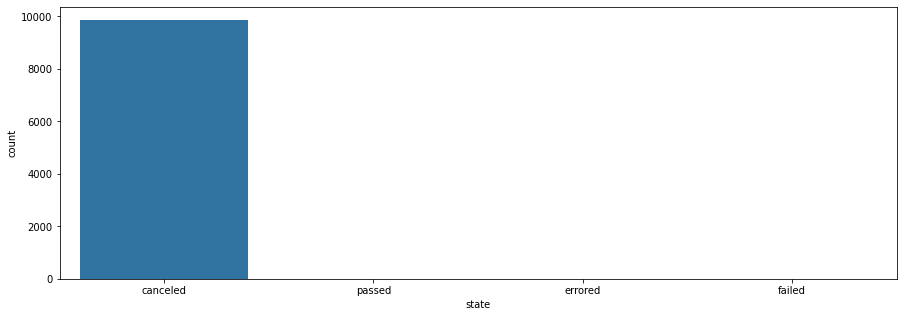

In [18]:
sns.countplot(jobs[jobs.started_at.isna()].state)

Missing values of started_at and finished_at are due to canceled jobs (or builds). This is therefore not an error in the data

**Time distribution**

In [20]:
jobs["started_at_day"] = jobs.started_at.dt.day
jobs["started_at_month"] = jobs.started_at.dt.month
jobs["started_at_year"] = jobs.started_at.dt.year

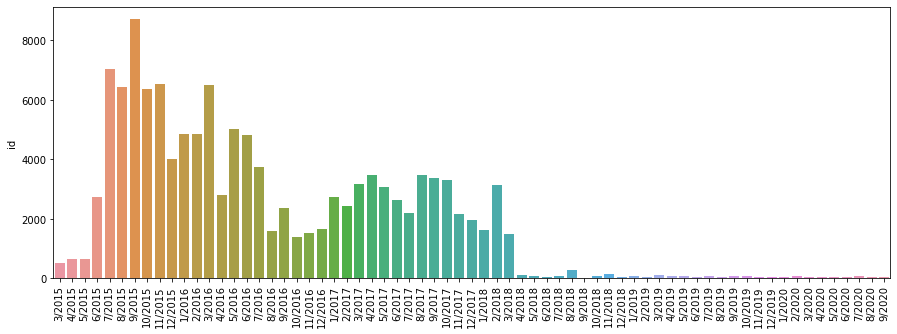

In [52]:
time_group = ["started_at_year", "started_at_month"]
x = jobs.groupby(time_group).id.count().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id)
ax.set_xticklabels(list(x.started_at_month.astype(int).astype(str) + "/" + x.started_at_year.astype(int).astype(str)),
                  rotation=90)
plt.show()

There has been a decrease of number of jobs per month after 3/2018. This can possibly be due to the change identified in the builds dataset as well. The distribution is however different. There has been a decrease of number of jobs after the peak of 9/2015. Possibly this is due to new configuration of Travis which reduced the number of jobs per build.

### Most common commit message

In [35]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.min()

Timestamp('2015-10-30 12:15:44+0000', tz='UTC')

In [40]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.max()

Timestamp('2016-10-11 03:13:39+0000', tz='UTC')

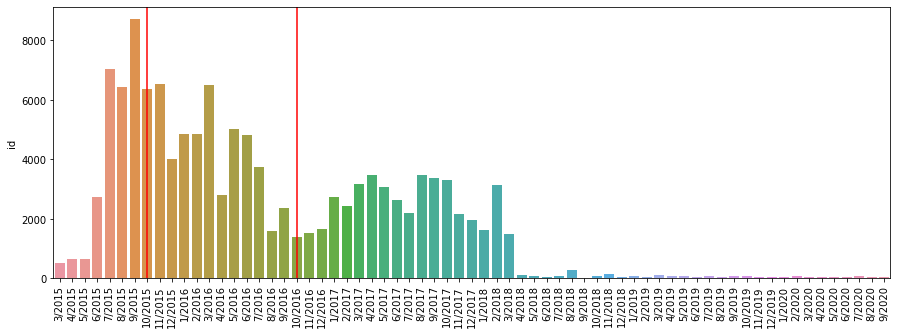

In [56]:
time_group = ["started_at_year", "started_at_month"]
x = jobs.groupby(time_group).id.count().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id)
ax.set_xticklabels(list(x.started_at_month.astype(int).astype(str) + "/" + x.started_at_year.astype(int).astype(str)),
                  rotation=90)
min_date = jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.min()
max_date = jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.max()
plt.axvline(7, 0, 10, color="r")
plt.axvline(19, 0, 10, color="r")
plt.show()

The influence of the commitmessage on the number of builds does not seem to be evident

In [58]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].commitsha.nunique()

219

In [61]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].commitref.nunique()

0

This commit message is associated with 219 unique sha but no commitref

### Commitref

In [65]:
x = jobs[jobs.commitref.isna()]

In [68]:
x.started_at.min()

Timestamp('2015-10-30 12:15:44+0000', tz='UTC')

In [69]:
x.started_at.max()

Timestamp('2017-05-23 19:34:46+0000', tz='UTC')

The lack of commitref seems to be confined between 10/2015 and 5/2017

### Number of jobs per build

In [104]:
build_job = builds.merge(jobs, left_on="id", right_on="buildid", suffixes=["_build", "_job"])
build_job.head()

,number_build,pull_request_number,id_build,event_type,finished_at_build,pull_request_title,started_at_build,duration,state_build,started_at_day_build,started_at_month_build,started_at_year_build,id_job,buildid,started_at_job,created_at,finished_at_job,number_job,state_job,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day_job,started_at_month_job,started_at_year_job
0,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118996,99118995,2015-12-28 16:18:43+00:00,2015-12-28 16:18:33.261000+00:00,2015-12-28 16:29:34+00:00,6995.1,passed,2018-05-29T22:02:47.694Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
1,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118997,99118995,2015-12-28 16:18:41+00:00,2015-12-28 16:18:33.279000+00:00,2015-12-28 16:34:08+00:00,6995.2,passed,2018-05-29T22:02:47.753Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
2,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118998,99118995,2015-12-28 16:18:41+00:00,2015-12-28 16:18:33.295000+00:00,2015-12-28 16:33:47+00:00,6995.3,passed,2018-05-29T22:02:47.790Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
3,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118999,99118995,2015-12-28 16:18:43+00:00,2015-12-28 16:18:33.312000+00:00,2015-12-28 16:34:04+00:00,6995.4,passed,2018-05-29T22:02:47.798Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
4,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99119000,99118995,2015-12-28 16:18:42+00:00,2015-12-28 16:18:33.332000+00:00,2015-12-28 16:31:37+00:00,6995.5,passed,2018-05-29T22:02:15.403Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0


**Average**

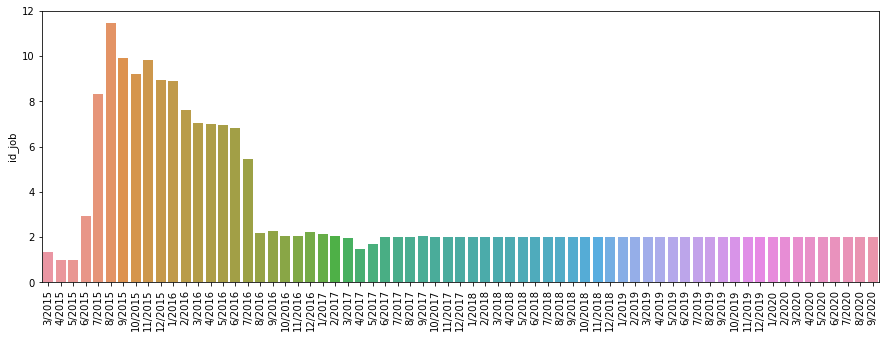

In [127]:
time_group = ["started_at_year_build", "started_at_month_build"]
x = build_job.groupby(["id_build"] + time_group).id_job.count().reset_index()\
    .groupby(time_group).mean().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id_job)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
plt.show()

**Maximum**

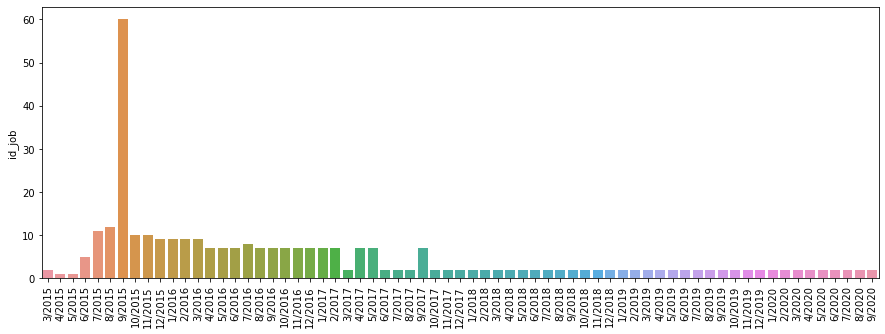

In [130]:
time_group = ["started_at_year_build", "started_at_month_build"]
x = build_job.groupby(["id_build"] + time_group).id_job.count().reset_index()\
    .groupby(time_group).max().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id_job)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
plt.show()

**Minimum**

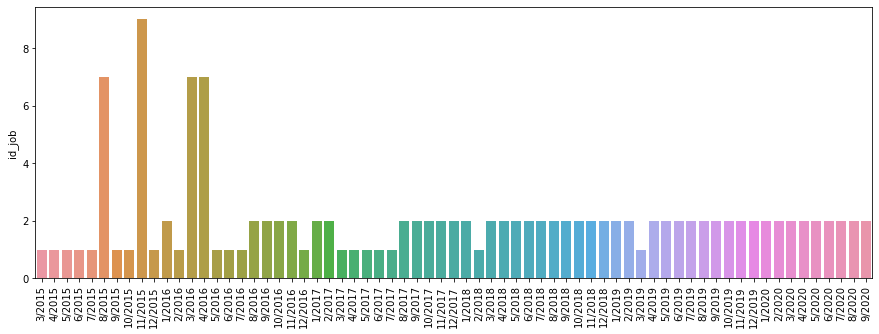

In [131]:
time_group = ["started_at_year_build", "started_at_month_build"]
x = build_job.groupby(["id_build"] + time_group).id_job.count().reset_index()\
    .groupby(time_group).min().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id_job)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
plt.show()

* The average number of jobs per build has not been constant througout the years. It has been however stable around 2 after 7/2016. 
*Minimum values show similar behavior, somewhat stabilizing after 7/2016 
* Maximum stabilizes a bit later, after 5/2017.

### State

<AxesSubplot:xlabel='state', ylabel='count'>

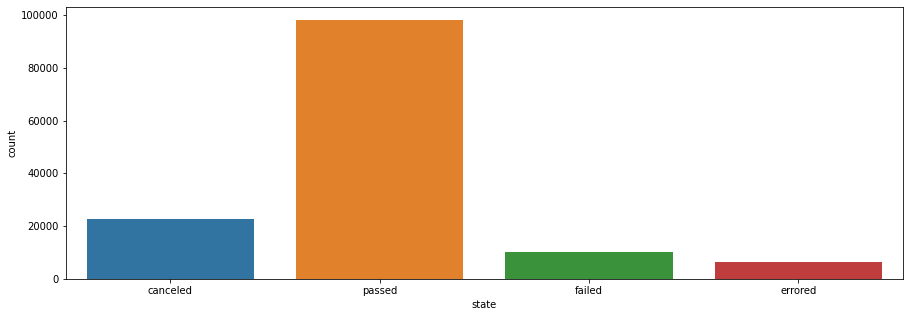

In [132]:
sns.countplot(jobs.state)

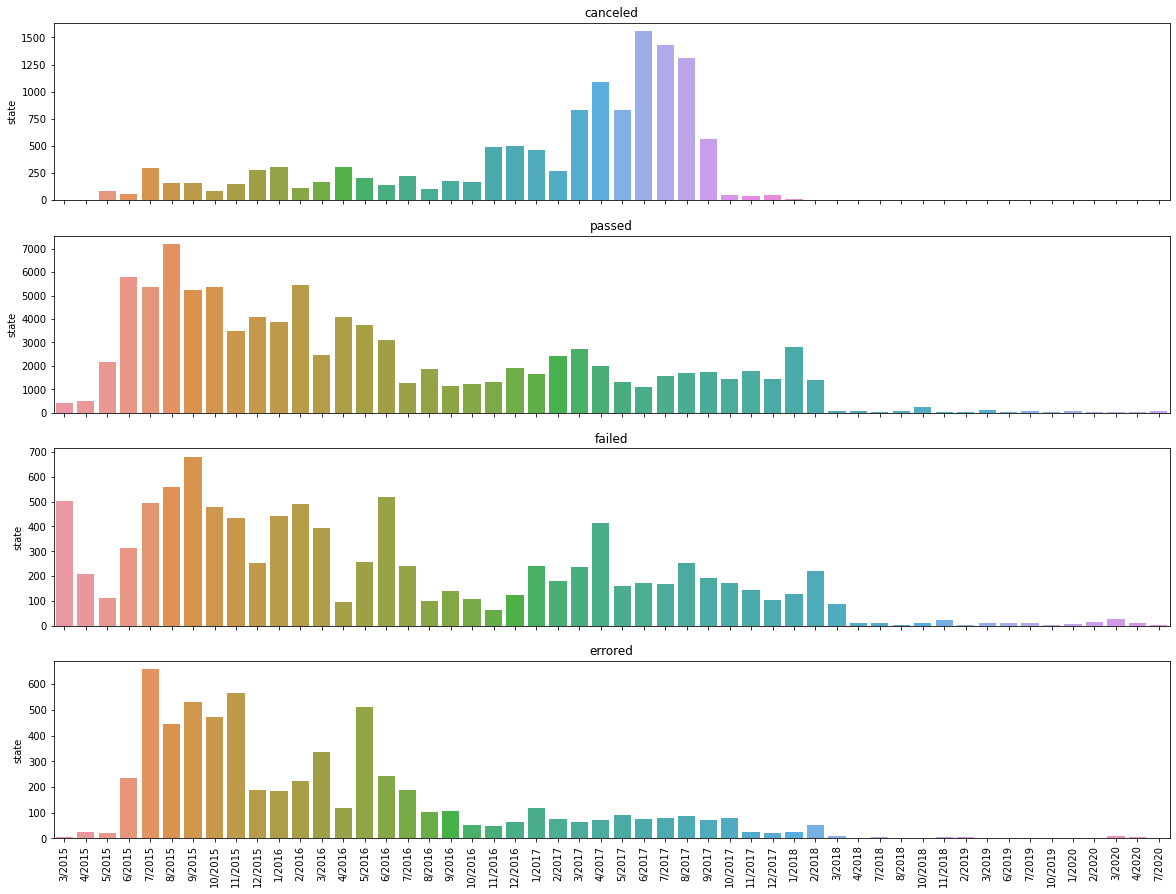

In [144]:
time_group = ["started_at_year", "started_at_month"]
f, axes = plt.subplots(jobs.state.nunique(), 1, sharex=True, figsize=(20,15))
for i, state in enumerate(jobs.state.unique()):
    x = jobs[jobs.state == state].groupby(time_group).count().reset_index()
    ax = sns.barplot(x=x.index, y=x.state, ax=axes[i])
    ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
    ax.set_title(state)

* Canceled and errored seems to have almost dissapeared after x
* Canceled have had a spike right before x, maybe a sign of changes in the CI process

**What is the state distribution for pull requests with many builds?**

<AxesSubplot:xlabel='state', ylabel='count'>

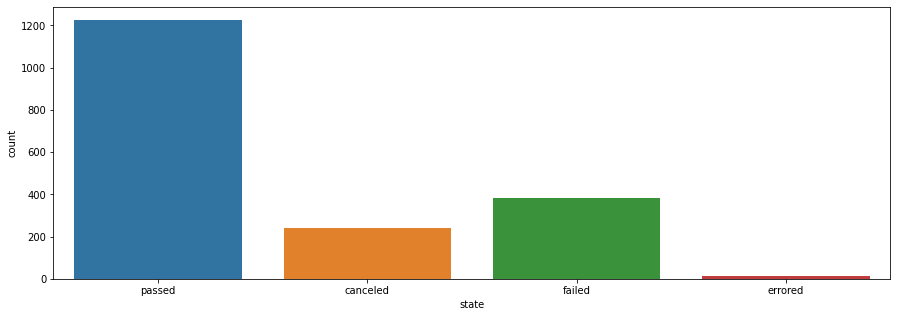

In [145]:
pr_build_count = builds.groupby(builds.pull_request_number).id.count()
pr_build_tail =  list(pr_build_count[pr_build_count > 20].index)
sns.countplot(builds[builds.pull_request_number.isin(pr_build_tail)].state)

### Duration

**Investigate NaN values**

In [146]:
builds[builds.duration.isna()]

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state,started_at_day,started_at_month,started_at_year
730,6265,NaN,92082939,push,2015-11-27 13:29:53+00:00,NaN,2015-11-19 17:02:00+00:00,NaN,canceled,19.0,11.0,2015.0
5691,5304,NaN,84464803,push,NaT,NaN,2015-10-09 09:14:28+00:00,NaN,canceled,9.0,10.0,2015.0


Both are canceled builds. Duration can be set to 0 instead

In [147]:
builds[builds.duration.isna()] = 0

**Investigate negative outliers**

<AxesSubplot:xlabel='state', ylabel='count'>

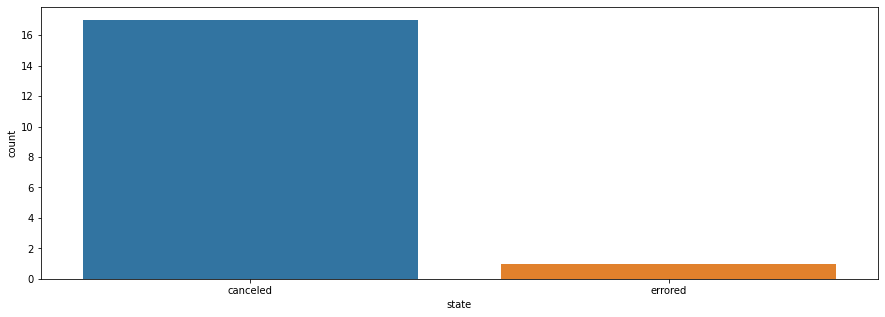

In [148]:
sns.countplot(builds[builds.duration < 0].state)

All builds with negative duration are either in canceled or errored state

<AxesSubplot:xlabel='state', ylabel='count'>

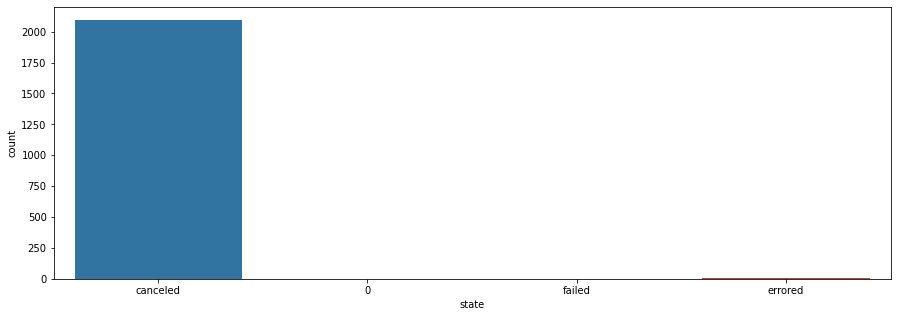

In [149]:
sns.countplot(builds[builds.duration == 0].state)

A more proper value is 0 for those builds (which some builds already have). Negative duration should not be allowed.

**Imputing negative outliers**

In [150]:
builds[builds.duration < 0] = 0

**Investigating positive outliers**

<AxesSubplot:>

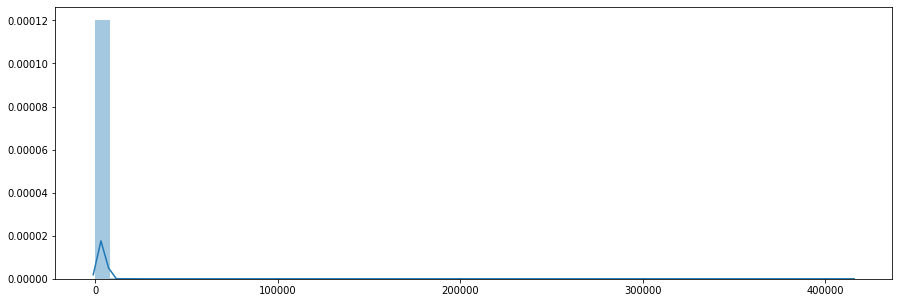

In [151]:
sns.distplot(list(builds.duration.sort_values()))

<AxesSubplot:>

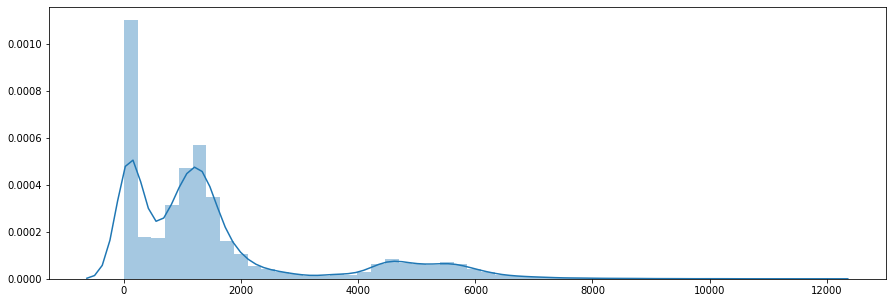

In [152]:
sns.distplot(list(builds.duration.sort_values())[:-20])

<AxesSubplot:xlabel='duration'>

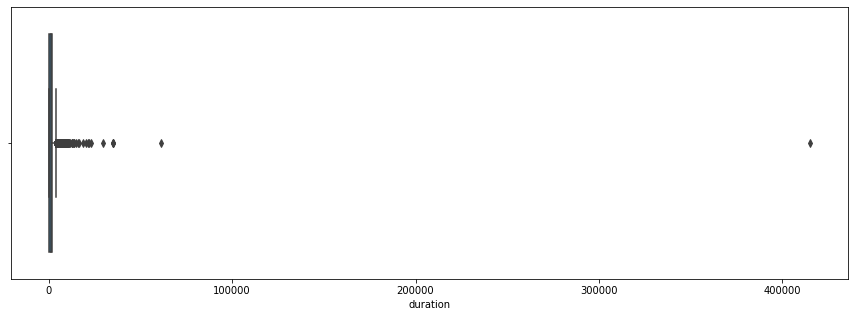

In [153]:
sns.boxplot(builds.duration)

In [154]:
boxplot_stats(builds.duration.dropna())[0]["fliers"].min()

3939.0

We detect the presence of many outliers, the smallest of which is 3939 seconds (more than an hour)

**Distribution of outliers**

In [155]:
duration_outliers = builds[builds.duration > 3939]

Text(0.5, 1.0, 'Year')

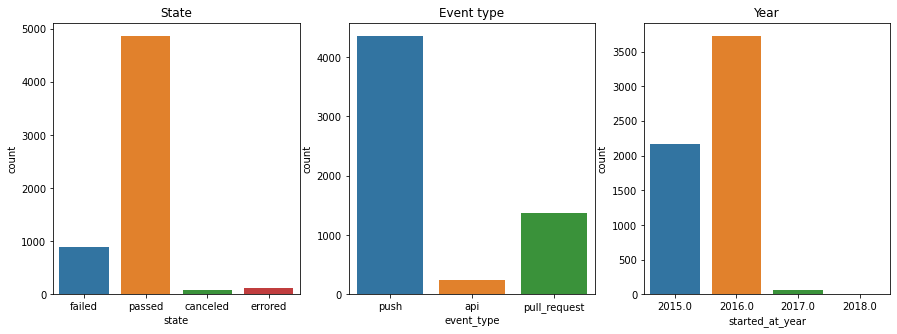

In [156]:
f, axes = plt.subplots(1,3)
sns.countplot(duration_outliers.state, ax=axes[0])
axes[0].set_title("State")
sns.countplot(duration_outliers.event_type, ax=axes[1])
axes[1].set_title("Event type")
sns.countplot(duration_outliers.started_at_year, ax=axes[2])
axes[2].set_title("Year")

* State and event type distribution seem to follow the distribution of the whole dataset
* These outliers seem to be concentrated in the early years of the project on TravisCI. Maybe this is due to inexperience with CI processes and misconfigurations of builds

### Pull request title

Top most builded pull requests by title

In [158]:
builds.groupby(builds.pull_request_title).id.count().sort_values(ascending=False).head(10)

pull_request_title
Use Gradle instead of Maven                               103
MMF-324 introduce concept of build-in Quality profiles     71
MMF-753 start stop cluster improvements                    69
Feature/branches                                           62
MMF-1134 Pull Request as 1st class citizen                 61
SONAR-10345 manage webhooks                                59
SONAR-8092 generalise startup of es indexers               46
Upgrade to ElasticSearch 5.5                               43
MMF-659 faster global search with elastic search           42
MMF-763 Revamped Issues page                               40
Name: id, dtype: int64